In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
with_resource = pd.read_csv('30foldCV/metrics_summary.csv')
with_resource['experiment'] = 'With Resource'
without_resource = pd.read_csv('30foldCV_no_Resource/metrics_summary.csv')
without_resource['experiment'] = 'Without Resource'
plot_data = pd.concat([with_resource, without_resource])
plot_data.head(5)

,error,nleaves,ntrees,model,experiment
0,0.148920,598.0,100.0,LGBM,With Resource
1,0.175643,586.0,100.0,LGBM,With Resource
2,0.178575,601.0,100.0,LGBM,With Resource
3,0.143573,602.0,100.0,LGBM,With Resource
4,0.177686,598.0,100.0,LGBM,With Resource


In [3]:
without_resource.model.value_counts()

SKLEARN Mean Imputing    30
CVB                      30
CatBoost                 30
Vanilla GBM              30
XGBOOST Mean Imputing    30
LGBM                     30
Name: model, dtype: int64

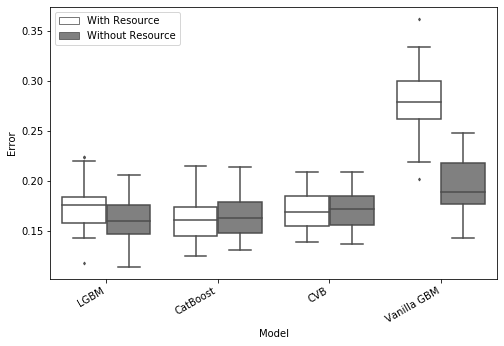

In [4]:
palette ={"With Resource": "w", "Without Resource": "gray"}
plt.figure(figsize=(8,5))
temp_plot_data = plot_data[plot_data['model'].isin(['LGBM', 'Vanilla GBM', 'CatBoost', 'CVB'])]
ax = sns.boxplot(x = 'model', y = 'error', hue = 'experiment',palette=palette, data = temp_plot_data, flierprops = dict(markerfacecolor = '0.50', markersize = 2))
# ax.set_title('Error on Amazon')
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.get_figure().savefig(f"error_on_amazon_with_without_resource.png")
plt.show()

In [5]:
plot_data.groupby(['model','experiment'])['error'].agg(['mean','size'])

mean  size
model                 experiment                      
CVB                   With Resource     0.171563    30
                      Without Resource  0.172260    30
CatBoost              With Resource     0.160560    30
                      Without Resource  0.164677    30
LGBM                  With Resource     0.172439    30
                      Without Resource  0.161736    30
SKLEARN Mean Imputing With Resource     0.276020    30
                      Without Resource  0.207310    30
Vanilla GBM           With Resource     0.279460    30
                      Without Resource  0.193582    30
XGBOOST Mean Imputing With Resource     0.295272    30
                      Without Resource  0.228885    30

In [6]:
from scipy.stats import ttest_ind

def perform_one_sided_test(a , b, significance_level = 0.05):
    # h_0: a < b
    print(F"Variance of the samples: {np.round(np.std(a),5)} {np.round(np.std(b),5)}")
    t, two_sided_p_value = ttest_ind(a, b,equal_var = False)
    print(F"two sided p value: {two_sided_p_value}")
    one_sided_p_value = two_sided_p_value/2
    if t > 0 and one_sided_p_value < significance_level:
        result = 'H_1'
    else:
        result = 'H_0'
    print(F"t is {np.round(t,2)}")
    print(F"mean: m_0: {np.round(np.mean(a),5)}, mean: m_1: {np.round(np.mean(b),5)}")
    print(F"{result}, p_value: {np.round(one_sided_p_value,3)}")

In [7]:
for model in plot_data.model.unique():
    with_ = plot_data[(plot_data.model == model) & (plot_data.experiment == 'With Resource')]['error'].tolist()
    without_ = plot_data[(plot_data.model == model) & (plot_data.experiment == 'Without Resource')]['error'].tolist()
    print(f'MODEL: {model}')
    print('#'*50)
    perform_one_sided_test(with_ , without_)

MODEL: LGBM
##################################################
Variance of the samples: 0.02388 0.02094
two sided p value: 0.07481509451259159
t is 1.81
mean: m_0: 0.17244, mean: m_1: 0.16174
H_1, p_value: 0.037
MODEL: CatBoost
##################################################
Variance of the samples: 0.0212 0.02014
two sided p value: 0.4514176492028801
t is -0.76
mean: m_0: 0.16056, mean: m_1: 0.16468
H_0, p_value: 0.226
MODEL: CVB
##################################################
Variance of the samples: 0.01831 0.01905
two sided p value: 0.8875167086806075
t is -0.14
mean: m_0: 0.17156, mean: m_1: 0.17226
H_0, p_value: 0.444
MODEL: Vanilla GBM
##################################################
Variance of the samples: 0.0349 0.0298
two sided p value: 3.052782730731702e-14
t is 10.08
mean: m_0: 0.27946, mean: m_1: 0.19358
H_1, p_value: 0.0
MODEL: SKLEARN Mean Imputing
##################################################
Variance of the samples: 0.03399 0.03105
two sided p value: 5.58